# Chipotle **


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
'% matplotlib inline'

sns.set_style("white")


### Step 2. Import the dataset of `chipotle` and assign it to a variable called chipo.

In [4]:
address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(address, sep="\t")

### Step 3. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 4. Create a histogram of the top 5 items bought

In [6]:
top_items = chipo["item_name"].value_counts()[0:5]

In [10]:
top_items = top_items[::-1]

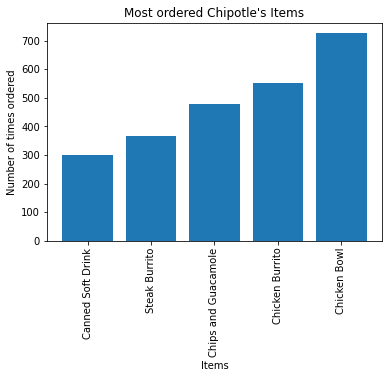

In [161]:
plt.bar(top_items.index, top_items)
plt.xlabel("Items")
plt.ylabel("Number of times ordered")
plt.xticks(top_items.index, labels = (top_items.index), rotation = 90)
plt.title("Most ordered Chipotle\'s Items")

plt.show()

### Step 5. Create a scatterplot with the number of items orderered per order price

Make sure you get the same labels and title
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [290]:
# Elimino el símbolo del dolar para poder ordenar el precio de mayor a menor
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
chipo = chipo.sort_values("item_price", ascending = False)
chipo

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
...,...,...,...,...,...
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09
2922,1162,1,Bottled Water,NaN,1.09
1396,567,1,Canned Soda,[Coca Cola],1.09
2562,1014,1,Canned Soda,[Coca Cola],1.09


In [291]:
order_items = chipo.groupby("order_id").sum()
order_items

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


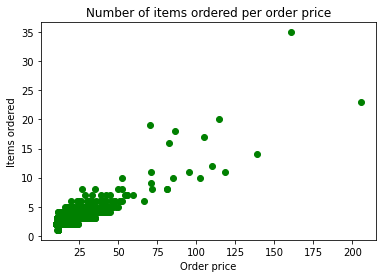

In [296]:
plt.scatter(x=order_items["item_price"], y=order_items["quantity"], c="green")
plt.xlabel("Order price")
plt.ylabel("Items ordered")
plt.title("Number of items ordered per order price")

plt.show()